In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mnist= tf.keras.datasets.fashion_mnist

In [ ]:
type(mnist)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print("x_train_shape:",x_train.shape)
print("x_test_shape:",x_test.shape)
print("y_train_shape:",y_train.shape)
print("y_test_shape:",y_test.shape)

x_train_shape: (60000, 28, 28)
x_test_shape: (10000, 28, 28)
y_train_shape: (60000,)
y_test_shape: (10000,)


In [ ]:
print("unique value:",np.unique(y_train))
print("mean of x_train:",np.mean(x_train))
print("max of x_train:",np.max(x_train))
print("mean of x_test:",np.mean(x_test))

unique value: [0 1 2 3 4 5 6 7 8 9]
mean of x_train: 72.94035223214286
max of x_train: 255
mean of x_test: 73.14656658163265


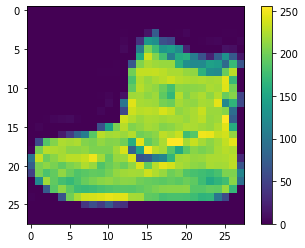

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
x_train=x_train/255
x_test=x_test/255

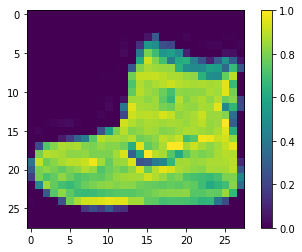

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

<center><h1>Build Of Model With Tensorflow 2.0</h1></center>

In [ ]:
model=tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [ ]:
model.add(tf.keras.layers.Dense(128,activation='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.optimizer=tf.optimizers.Adam
#model.loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True)
#model.metrics=['accuracy']
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.5111 - accuracy: 0.8208 - val_loss: 0.4203 - val_accuracy: 0.8452
Epoch 2/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3835 - accuracy: 0.8612 - val_loss: 0.3703 - val_accuracy: 0.8658
Epoch 3/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3450 - accuracy: 0.8734 - val_loss: 0.3524 - val_accuracy: 0.8728
Epoch 4/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3207 - accuracy: 0.8812 - val_loss: 0.3474 - val_accuracy: 0.8744
Epoch 5/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2991 - accuracy: 0.8893 - val_loss: 0.3385 - val_accuracy: 0.8759
Epoch 6/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2843 - accuracy: 0.8942 - val_loss: 0.3225 - val_accuracy: 0.8810
Epoch 7/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2729 - accuracy: 0.8986 - val_loss: 0.3153 - val_accu

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test,batch_size=10)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8756


In [ ]:
history.history

{'accuracy': [0.8207708597183228,
  0.8612291812896729,
  0.8733541369438171,
  0.8812291622161865,
  0.8893333077430725,
  0.8942083120346069,
  0.89864581823349,
  0.9020624756813049,
  0.906624972820282,
  0.9097083210945129],
 'loss': [0.5111243724822998,
  0.38347139954566956,
  0.3449694514274597,
  0.3207339644432068,
  0.29913389682769775,
  0.28432345390319824,
  0.2729332745075226,
  0.2608661651611328,
  0.2503814995288849,
  0.24078777432441711],
 'val_accuracy': [0.8451666831970215,
  0.8658333420753479,
  0.8728333115577698,
  0.8744166493415833,
  0.8759166598320007,
  0.8809999823570251,
  0.8855833411216736,
  0.8841666579246521,
  0.8870000243186951,
  0.8861666917800903],
 'val_loss': [0.42030224204063416,
  0.3703451454639435,
  0.35240522027015686,
  0.3473874628543854,
  0.33848586678504944,
  0.32249337434768677,
  0.3152809739112854,
  0.32033321261405945,
  0.30677229166030884,
  0.3175322711467743]}

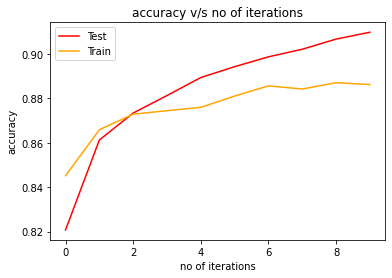

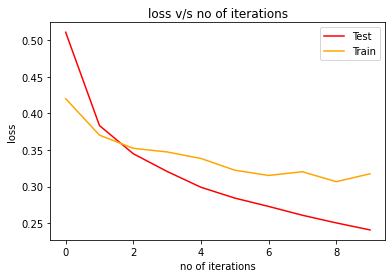

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='orange')
plt.xlabel('no of iterations')
plt.ylabel('accuracy')
plt.title('accuracy v/s no of iterations')
plt.legend(['Test','Train'])
plt.show()
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='orange')
plt.xlabel('no of iterations')
plt.ylabel('loss')
plt.title('loss v/s no of iterations')
plt.legend(['Test','Train'])
plt.show()

In [ ]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mat= confusion_matrix(y_test,y_pred)

In [ ]:
mat

array([[714,   3,   8,  41,   2,   0, 225,   0,   7,   0],
       [  0, 973,   0,  19,   2,   0,   3,   0,   3,   0],
       [ 10,   0, 802,  13,  71,   0, 102,   0,   2,   0],
       [ 12,  12,   7, 905,  22,   0,  37,   0,   5,   0],
       [  1,   1, 105,  40, 749,   0,  99,   0,   5,   0],
       [  1,   0,   0,   1,   0, 937,   0,  39,   1,  21],
       [ 63,   2,  65,  33,  46,   0, 780,   0,  11,   0],
       [  0,   0,   0,   0,   0,   9,   0, 961,   0,  30],
       [  2,   0,   2,   4,   4,   2,   7,   5, 974,   0],
       [  0,   0,   0,   1,   0,   4,   1,  33,   0, 961]])

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
import mlxtend

In [ ]:
print(mlxtend.__version__)

0.17.3


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd063e58048>)

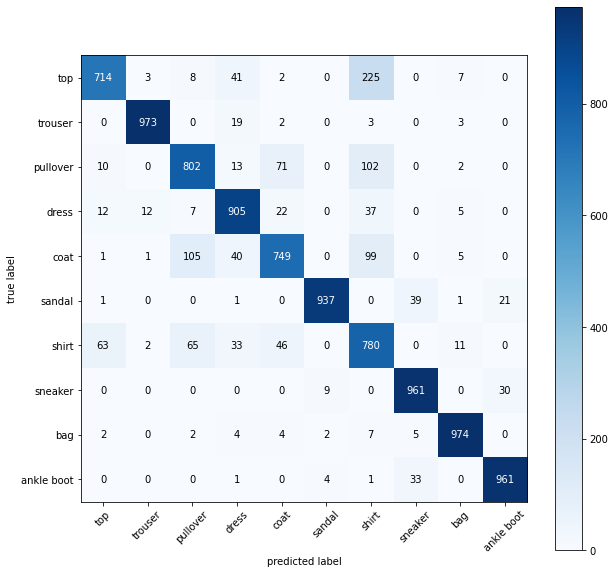

In [ ]:
plot_confusion_matrix(mat,colorbar=True,figsize=(10,10),class_names=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot'])